In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Reconocimiento de Patrones y Aprendizaje Automatizado

## [Laboratorio] Tarea 1

- 421023697 - Alex Nakamura Díaz Francés
- 420003708 - David Hernández Uriostegui
- 420003007 - Diego Javier Padilla Lara
- 318163790 - Erick Daniel Arroyo Martínez
- 318685496 - Sebastián Alamina Ramírez

## 1

1.a) Escriban un programa que imprima todos los números pares del 0 al 100.

In [ ]:
for i in range(0,101):
  if i % 2 == 0:
    print(i)

1.b) Escriban un programa que calcule el área de un círculo a partir de su radio.

In [2]:
import numpy as np
import math
def area(r):
  return np.pi*math.pow(r,2)

1.c) Escriban un programa que calcule la suma de todos los números en una lista.

In [3]:
def sumList(list):
  suma = 0
  for e in list:
    suma += e
  return suma

1.d) Escriban una función que reciba una lista y devuelva el número más grande.

In [4]:
def max(list):
  max = list[0]
  for e in list:
    if e  > max :
      max=e
  return max

1.e) Escriba un programa que convierta una cantidad dada en dólares a pesos, usa la función round() para usar solo dos
cifras significativas.

In [5]:
import numpy as np
def conver(d):
  return np.round(d*17.99,2)

1.f)  Escriban un programa que verifique si un número dado es primo o no.

In [ ]:
def isPrime(n):
  flag = True
  if n == 1:
    return False
  elif n>1:
    for i in range(2,n):
      if(n%i==0):
        flag = False
  return flag
print(isPrime(5))

1.g) Escriban un programa que calcule la suma de los números pares en una lista.


In [7]:
def sumPairNums(list):
  sum = 0
  for e in list:
    if(e%2==0):
      sum +=e
  return sum

1.h) Escriban un programa que devuelva una lista con los n términos de la serie de Fibonacci.


In [8]:
def nFib(n):
  if n<=0:
    return [0]
  list = [0,1]
  while (len(list)<=n):
    list.append(list[len(list)-1]+list[len(list)-2])
  return list

## 2

Escribir un programa que calcule el polinomio de Taylor de las siguientes funciones en $x_0 = 0$ de grado $n$ = ?, y graficar en una misma imagen la función real (usando *numpy*) junto con la función polinómica de Taylor. Dé un valor para el cual $n$ aproxime toda la función sobre el intervalo $[0, 2\pi]$.

Aproximando 'sin' con 9 grados:


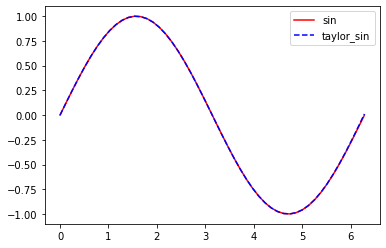



Aproximando 'cos' con 9 grados:


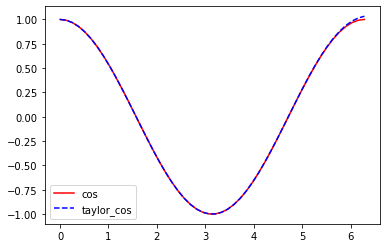



Aproximando 'sinh' con 6 grados:


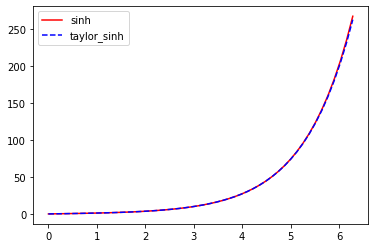



Aproximando 'cosh' con 6 grados:


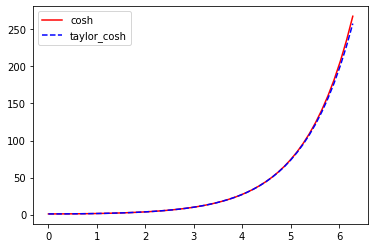



Aproximando 'exp' con 12 grados:


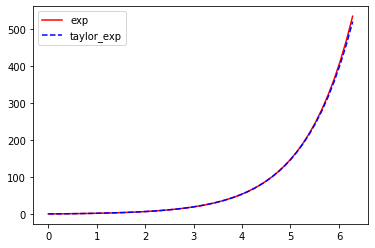

In [ ]:
# A Taylor series is also called a Maclaurin series,
# when 0 is the point where the derivatives are considered...

def taylor_sin(x, n):
  """Serie de Maclaurin para la función Seno"""
  serie = 0
  for i in range(n):
    serie += ((-1)**i * x**(2*i+1))/math.factorial(2*i+1)
  return serie

def taylor_cos(x, n):
  """Serie de Maclaurin para la función Coseno"""
  serie = 0
  for i in range(n):
    serie += ((-1)**i * x**(2*i))/math.factorial(2*i)
  return serie

def taylor_sinh(x, n):
  """Serie de Maclaurin para la función Seno Hiperbólico"""
  serie = 0
  for i in range(n):
    serie += (x**(2*i+1))/math.factorial(2*i+1)
  return serie

def taylor_cosh(x, n):
  """Serie de Maclaurin para la función Coseno Hiperbólico"""
  serie = 0
  for i in range(n):
    serie += (x**(2*i))/math.factorial(2*i)
  return serie

def taylor_exp(x, n):
  """Serie de Maclaurin para la función Exponencial"""
  serie = 0
  for i in range(n):
    serie += x**i / math.factorial(i)
  return serie

# Funciones a aproximar, y los grados encontrados.
funciones = [
    (np.sin, taylor_sin, 9),
    (np.cos, taylor_cos, 9),
    (np.sinh, taylor_sinh, 6),
    (np.cosh, taylor_cosh, 6),
    (np.exp, taylor_exp, 12),
]

# Espacio de graficación.
x = np.linspace(0,2*math.pi)

# Aproximación y graficación de cada función.
for f,pT,n in funciones:
  print(f"Aproximando '{f.__name__}' con {n} grados:")
  plt.plot(x, f(x), '-r', label=f.__name__) # Función real.
  plt.plot(x, pT(x, n), '--b', label=pT.__name__) # Función aproximada.
  plt.legend()
  plt.show()
  print("\n")

## 3

Use el método Newton-Raphson para encontrar una raíz ($f(x)-0$) y especifique el valor inicial $x_0=?$ usado (Nota: no usar el valor de la raíz en $x_0$) así como la derivada de:
* (a) Ejemplo $f(x)=\sin(x)$ con valor inicial $x_0=3$ y derivada $f'(x)=\cos(x)$ da:
  
  Aproximación de la solución de $\sin(x)=0$: 
  
  3.141592653589793
* (b) $f(x)=\cos(x)$
* (c) $f(x)=x\sin(2x)+1$
* (d) $f(x)=x^2+5x+6$
* (e) $f(x)=x^3+6x^2+11x+6$
* (f) $f(x)=x+e^x$

In [ ]:
def newton_raphson(f, df, x0, error=1e-10, limit=1e8):
    x = x0
    remaining = limit
    while np.abs(f(x)) > error and remaining:
        x = x - f(x) / df(x)
        remaining -= 1
    if not remaining:
        raise "Se excedió el número de ciclos permitidos"
    return x


def show_newton_raphson_result(
    f, f_name, f_tex_name, df, df_name, x0, x_min, x_max, plot_num=50
):
    sol = newton_raphson(f, df, x0)
    print(
        f"Aproximación de la solución de {f_name}=0 con valor inicial {x0} y derivada {df_name}: \n\t{sol}"
    )

    fig, ax = plt.subplots()

    x = np.linspace(min([x0, x_min, sol]), max([x0, x_max, sol]), num=plot_num)
    fx = f(x)
    xmin, xmax = min(x), max(x)
    ymin, ymax = min(fx), max(fx)

    ax.plot(x, fx, label=f"$f(x)={f_tex_name}$")
    ax.vlines(x0, ymin, ymax, colors="r", linestyles="dashed", label=f"$x=x_0={x0}$")
    ax.vlines(
        sol, ymin, ymax, colors="g", linestyles="dashed", label="Solución $f(x)=0$"
    )
    ax.hlines(0, xmin, xmax, colors="k", label="0")

    ax.set_xlabel("x")

    ax.legend()

    return fig, ax

(a) Ejemplo $f(x)=\sin(x)$

Aproximación de la solución de sin(x)=0 con valor inicial 2 y derivada cos(x): 
	3.1415926536808043


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='x'>)

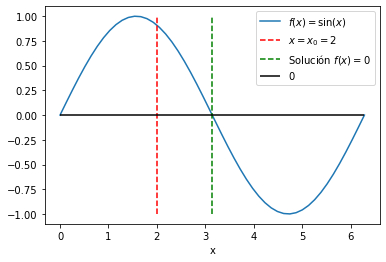

In [ ]:
show_newton_raphson_result(
    f=lambda x: np.sin(x),
    f_name="sin(x)",
    f_tex_name=r"\sin(x)",
    df=lambda x: np.cos(x),
    df_name="cos(x)",
    x0=2,
    x_min=0,
    x_max=np.pi*2,
)

(b) $f(x)=\cos(x)$

Aproximación de la solución de cos(x)=0 con valor inicial 4 y derivada -cos(x): 
	4.71238898038469


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='x'>)

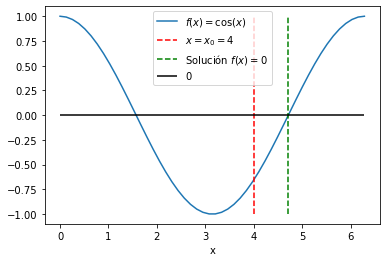

In [ ]:
show_newton_raphson_result(
    f=lambda x: np.cos(x),
    f_name="cos(x)",
    f_tex_name=r"\cos(x)",
    df=lambda x: -np.sin(x),
    df_name="-cos(x)",
    x0=4,
    x_min=0,
    x_max=2*np.pi,
)

(c) $f(x)=x\sin(2x)+1$

Aproximación de la solución de x*sin(2x)+1=0 con valor inicial 3.5 y derivada sin(2x)+2xcos(2x): 
	2.969880233067546


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='x'>)

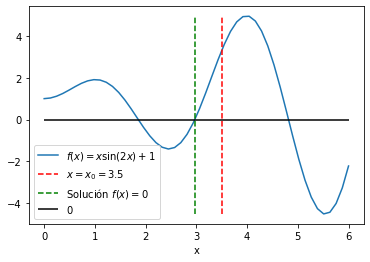

In [ ]:
show_newton_raphson_result(
    f=lambda x: x * np.sin(2 * x) + 1,
    f_name="x*sin(2x)+1",
    f_tex_name=r"x\sin(2x)+1",
    df=lambda x: np.sin(2 * x) + 2 * x * np.cos(2 * x),
    df_name="sin(2x)+2xcos(2x)",
    x0=3.5,
    x_min=0,
    x_max=6,
)

(d) $f(x)=x^2+5x+6$

Aproximación de la solución de x^2+5x+6=0 con valor inicial -1 y derivada 2x+5: 
	-2.0


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='x'>)

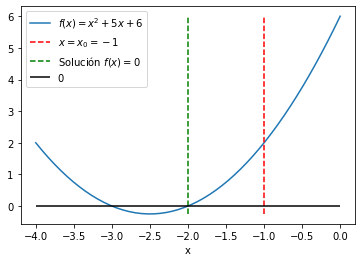

In [ ]:
show_newton_raphson_result(
    f=lambda x: x**2 + 5 * x + 6,
    f_name="x^2+5x+6",
    f_tex_name=r"x^2+5x+6",
    df=lambda x: 2 * x + 5,
    df_name="2x+5",
    x0=-1,
    x_min=-4,
    x_max=0,
)

(e) $f(x)=x^3+6x^2+11x+6$

Aproximación de la solución de x^3+6x^2+11x+6=0 con valor inicial 0 y derivada 3x^2 + 12x + 11: 
	-0.9999999999977106


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='x'>)

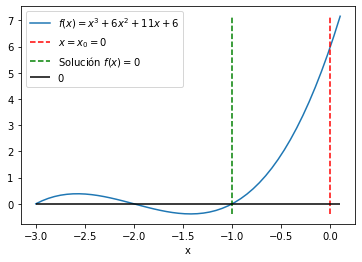

In [ ]:
show_newton_raphson_result(
    f=lambda x: x**3 + 6 * x**2 + 11 * x + 6,
    f_name="x^3+6x^2+11x+6",
    f_tex_name=r"x^3+6x^2+11x+6",
    df=lambda x: 3 * x**2 + 12 * x + 11,
    df_name="3x^2 + 12x + 11",
    x0=0,
    x_min=-3,
    x_max=0.1,
)


(f) $f(x)=x+e^x$

Aproximación de la solución de x+e^x=0 con valor inicial 0 y derivada 1+e^x: 
	-0.5671432904097811


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:xlabel='x'>)

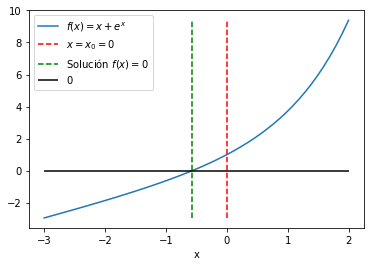

In [ ]:
show_newton_raphson_result(
    f=lambda x: x + np.power(np.e, x),
    f_name="x+e^x",
    f_tex_name=r"x+e^x",
    df=lambda x: 1 + np.power(np.e, x),
    df_name="1+e^x",
    x0=0,
    x_min=-3,
    x_max=2,
)


## 4

Usando Python y la ecuación de la recta, graficar la recta de puntos que pasan por los pares de puntos dados, e indicar su pendiente.

In [ ]:
# Bibliotecas para este ejercicio.
import matplotlib.pyplot as plt # Para graficar.
from tabulate import tabulate # Para tabular.
import numpy as np # NumPy :P

+-----------+-----------+-------------+
| Punto 1   | Punto 2   |   Pendiente |
+===========+===========+=============+
| (0, 2)    | (1, -2)   |          -4 |
+-----------+-----------+-------------+


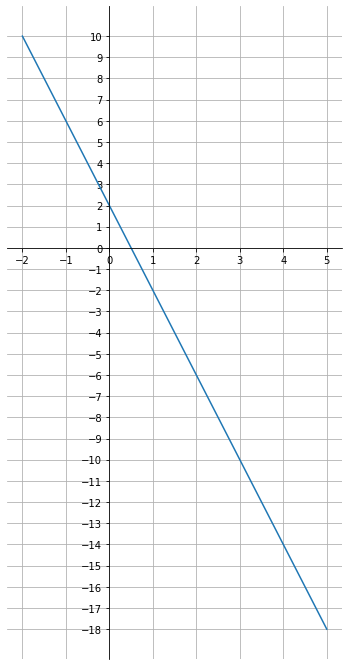






+-----------+-----------+-------------+
| Punto 1   | Punto 2   |   Pendiente |
+===========+===========+=============+
| (1, 2)    | (-1, -4)  |           3 |
+-----------+-----------+-------------+


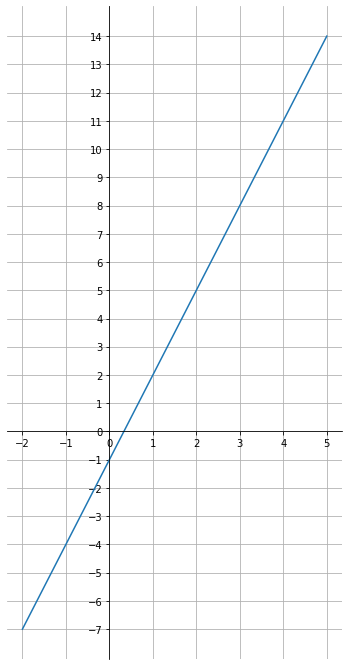






+-----------+-----------+-------------+
| Punto 1   | Punto 2   |   Pendiente |
+===========+===========+=============+
| (2, 2)    | (1, -6)   |           8 |
+-----------+-----------+-------------+


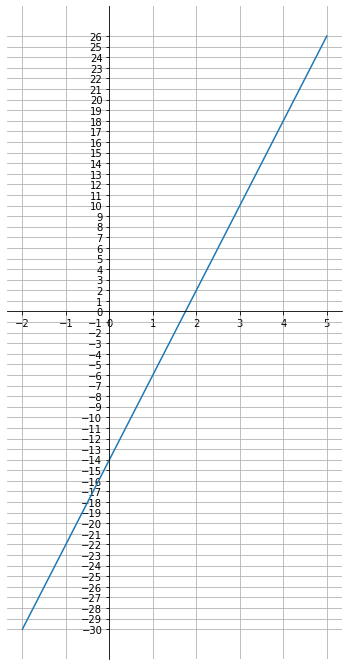






+-----------+-----------+-------------+
| Punto 1   | Punto 2   |   Pendiente |
+===========+===========+=============+
| (3, 2)    | (-1, -8)  |         2.5 |
+-----------+-----------+-------------+


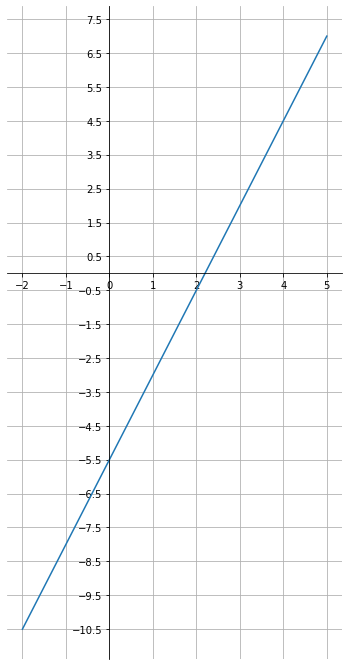






+-----------+-----------+-------------+
| Punto 1   | Punto 2   |   Pendiente |
+===========+===========+=============+
| (4, 2)    | (1, -10)  |           4 |
+-----------+-----------+-------------+


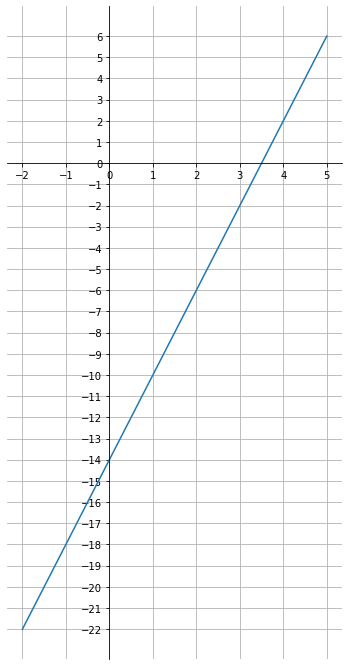

In [ ]:
# Pares de puntos dados.
puntos = [
    [(0, 2), (1, -2)],
    [(1, 2), (-1, -4)],
    [(2, 2), (1, -6)],
    [(3, 2), (-1, -8)],
    [(4, 2), (1, -10)],
]
x = np.linspace(-2,5) # Espacio de graficación.

def m(p1, p2):
  """Pendiente de una recta, dados dos de sus puntos."""
  return (p2[1]-p1[1])/(p2[0]-p1[0])

# Por cada par de puntos...
for p1,p2 in puntos:

  # Calculamos su pendiente.
  slope = m(p1, p2)

  # Tabulamos.
  table = [[p1, p2, slope]]
  headers = ["Punto 1", "Punto 2", "Pendiente"]
  print(tabulate(table, headers=headers, tablefmt="grid"))

  # Parámetros visuales.
  axis = plt.figure(figsize=(6,12)).add_subplot(1, 1, 1) # figsize define h,w.
  axis.spines['left'].set_position('zero') # Centrando el eje de las Y.
  axis.spines['bottom'].set_position('zero') # Centrando el eje de las X.
  axis.spines['right'].set_color('none') # Eliminando contorno no utilizado.
  axis.spines['top'].set_color('none') # Eliminando contorno no utilizado.
  axis.xaxis.set_ticks_position('bottom') # Los números del eje X van abajo
  axis.yaxis.set_ticks_position('left') # Los números del eje Y van a la izq.

  # Graficamos.
  b = p1[1]-slope*p1[0] # y=mx+b => b=t-mx
  y = slope*x+b
  plt.plot(x, y) # Agregamos al buffer.
  plt.grid() # Agregamos cuadrícula.
  plt.xticks(np.arange(min(x), max(x)+1, 1.0)) # Saltos de 1 en 1 en X.
  plt.yticks(np.arange(min(y), max(y)+1, 1.0)) # Saltos de 1 en 1 en Y.
  plt.show() # Mostramos el buffer.
  print("\n"*4)

## 5

**Genere una Interpolación Lineal usando n puntos de la función cos(x) y tan(x). Sobre el intervalo [0, 2π]. Indica cuantos
puntos n usaste. (Procura optimizar tu resultado).**

In [9]:
def lineal_inteporlation(x, y, function_name, increment=0.25):
  """
  Función para generar una interpolación lineal a partir de un
  conjunto de puntos
  """
  interpolation = interp1d(x, y)
    
  interpolation_numbers = []
  i = 0
  while i <= 2:
      interpolation_numbers.append(i*np.pi)
      i += increment
            
  interpolation_results = [interpolation(k) for k in interpolation_numbers]
  plt.figure(figsize = (10,8))
  plt.plot(x, y, 'bo', label="Original data")
    
  plt.plot(interpolation_numbers, interpolation_results, 'r--', label="Interpolation data")

  plt.title(f"Linear Interpolation for {function_name}")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [ ]:
# Primero lo hacemos para cos x
x = np.linspace(0, 2*np.pi, 10)
y = np.cos(x)
increment = 0.05
function = "cos (x)"
lineal_inteporlation(x, y, function,increment)

In [ ]:
# Ahora para tan (x)
x = np.linspace(0, 2*np.pi, 10)
y = np.tan(x)
increment = 0.05
function = "tan (x)"
lineal_inteporlation(x, y, function,increment)

### Notas



*   Decidimos usar sólo 10 puntos para que se pudiera notar el
compartamiento de los datos interpolados. Es fácil notar que entre más
puntos tengamos en nuestro conjunto de entrada, más se asemejará a la función
que deseamos.


## 6

In [ ]:
def get_divided_difference_table(x, y):
  """
  Función para obtener la tabla de diferencias para 
  poder realizar la interpolación
  """
  n = len(x)
  table = np.zeros([n, n])
  for i in range(n):
      table[i][0] = y[i]
  for j in range(1, n):
      for i in range(n-j):
          table[i][j] = (table[i+1][j-1] - table[i][j-1]) / (x[i+j] - x[i])
  return table

def newton_polynomial_inteporlation_aux(x, table, new_point):
  """
  Función que aplica la interpolación polinomial de newton de un punto
  """
  res = table[0][0]
  for i in range(1, len(x)):
      prod = 1
      for j in range(i):
          prod *= (new_point - x[j])
      res += table[0][i] * prod
  return res


def newton_polynomial_inteporlation(x, y, function_name, increment=0.25):
  """
  Función que realizar la interpolación polinomial de Newton de un conjunto
  de datos
  """
  table = get_divided_difference_table(x, y)
    
  interpolation_numbers = []
  i = 0
  while i <= 2:
      interpolation_numbers.append(i*np.pi)
      i += increment
            
  interpolation_results = [newton_polynomial_inteporlation_aux(x, table, k) for k in interpolation_numbers]
  plt.figure(figsize = (10,8))
  plt.plot(x, y, 'bo', label="Original data")
    
  plt.plot(interpolation_numbers, interpolation_results, 'r--', label="Interpolation data")

  plt.title(f"Newton Polynomial Interpolation for {function_name}")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

In [ ]:
# Primero lo hacemos para cos x
x = np.linspace(0, 2*np.pi, 10)
y = np.cos(x)
increment = 0.05
function = "cos (x)"
newton_polynomial_inteporlation(x, y, function,increment)

In [ ]:
# Ahora para tan (x)
x = np.linspace(0, 2*np.pi, 10)
y = np.tan(x)
increment = 0.05
function = "tan (x)"
newton_polynomial_inteporlation(x, y, function,increment)

### Notas

Mismas notas que el inciso 5

## 7

Genere una Interpolación Polinómica de Lagrange usando 10 puntos de la función $\cos x$ y $tan x$. Sobre el intervalo $[0, 2\pi]$. Indica cuantos puntos $n$ usaste y el polinomio obtenido.

In [ ]:
def lagrange(x, y, z):
    n = len(x)
    l = np.zeros(n)
    for i in range(n):                # Obtain the i-th Lagrange polynomial
        idx = np.ones(n, dtype=bool)  # using  boolean array indexing to 
        idx[i] = False                # exclude the i-th element from the product
        num = np.prod(z - x[idx])
        den = np.prod(x[i] - x[idx])
        l[i] = num / den

    return np.sum(y * l)

def interpolate(f, a, b, n, z):
    """
      :f:    np math function
      :a, b: interval [a, b]
      :n:    func points (equally spaced points)
      :z:    collection of points
    """
    x = np.linspace(a, b, n)    # Create an array of equally spaced points in [a, b]
    y = f(x)                    # Evaluate function at the points
    y_interp = np.zeros(len(z)) # Create np array

    # Obtain poynomial
    for i in range(len(z)):
        y_interp[i] = lagrange(x, y, z[i])

    return y_interp

- Para $\cos (x)$:

In [ ]:
# Interpolate `cos` at [0, 2pi] and n = 100 points
z = np.linspace(0, 2*np.pi, 100)
y_interp = interpolate(np.cos, 0, 2*np.pi, 10, z)

poly = np.poly1d(np.polyfit(x, y, deg=9))  # Obtain polynomial

# Plot
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(z, np.cos(z), label='cos')
ax.plot(z, y_interp, label='Lagrange', linestyle='dotted', color='red')
ax.set_title('Interpolacion Polinómica de Lagrange (coseno)')
ax.legend()
plt.show()

print(f'\nPolinomio obtenido: \n{poly}')  # Print polynomial

- Para $\tan (x)$:

In [ ]:
# Interpolate `tan` at [0, 2pi] and n = 100 points
z = np.linspace(0, 2*np.pi, 100)
y_interp = interpolate(np.tan, 0, 2*np.pi, 10, z)

poly = np.poly1d(np.polyfit(x, y, deg=9))  # Obtain polinomial

# Plot
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(z, np.tan(z), label='tan')
ax.plot(z, y_interp, label='Lagrange', linestyle='dotted', color='red')
ax.set_title('Interpolacion Polinómica de Lagrange (tangente)')
ax.legend()
plt.show()

print(f'\nPolinomio obtenido: \n{poly}')  # Print polynomial

Notemos que debido al particular comportamiento de la función $\tan$, tanto el graficador la Interpolación Polinómica de Lagrange tiene dificultades para capturar correctamente el comportamiento de la función 

In [ ]:
# Plot at -5 <= y <= 5
fig, ax = plt.subplots(figsize= (10,8))
ax.plot(z, np.tan(z), label='tan')
ax.plot(z, y_interp, label='Lagrange', linestyle='dotted', color='red')
ax.set_title('Interpolacion Polinómica de Lagrange (tangente)')
ax.legend()
plt.ylim(-5,5)
plt.show()

## 8

Genere una Interpolación Polinómica de B-spline usando $n$ puntos de la función $\cos x$ y $\tan x$. Sobre el intervalo $[0, 2\pi]$ con grado $k$.

In [ ]:
from scipy.interpolate import BSpline

def bspline_interpolation(f, a, b, k, n_points=100):
    """
      :f:         np math function
      :a, b:      interval [a, b]
      :k:         B-spline degree
      :n_points:  number of points at which to evaluate both functions
    """
    knots  = np.linspace(a, b, n_points+k+1)  # Define the interval and number of knot points
    values = f(knots)                         # Evaluate the function at the knot points
    spl    = BSpline(knots, values, k)        # B-spline basis functions

    x = np.linspace(a, b, n_points)           # Define the points at which to evaluate the interpolated function

    y = f(x)             # Evaluate the original function and the interpolated
    y_interp = spl(x)    # function at the desired points

    # Plot the original function and the interpolated function
    fig, ax = plt.subplots(figsize= (10,8))
    ax.plot(x, y, label=f'{f.__name__}')
    ax.plot(x, y_interp, label='B-spline', linestyle= ':', color= 'red')
    ax.legend()
    plt.show()

- Para $\cos(x)$:

In [ ]:
bspline_interpolation(np.cos, 0, 2*np.pi, 3)  # B-spline interpolation for `cos` at [0, 2pi] and degree k = 3

- Para $\tan(x)$:

In [ ]:
bspline_interpolation(np.tan, 0, 2*np.pi, 3)  # B-spline interpolation for `tan` at [0, 2pi] and degree k = 3